START → m = -1.000, b =  1.000
   y_pred = [ 0.000, -2.000]
   error  = [ 3.000,  8.000]
   MSE    = 36.50000
--------------------------------------------------
Iter 1:
   m = -0.065, b =  1.381
   y_pred = [ 1.316,  1.187]
   error  = [ 1.684,  4.813]
   MSE    = 12.99908
   ∇m = -27.000, ∇b = -11.000
   Δm =  0.935, Δb =  0.381
   α ≈ 0.035 (effective learning rate)
--------------------------------------------------
Iter 2:
   m =  1.379, b =  1.791
   y_pred = [ 3.171,  5.929]
   error  = [-0.171,  0.071]
   MSE    = 0.01707
   ∇m = -16.122, ∇b =  -6.496
   Δm =  1.444, Δb =  0.410
   α ≈ 0.076 (effective learning rate)
--------------------------------------------------
Iter 3:
   m =  1.421, b =  1.692
   y_pred = [ 3.113,  5.956]
   error  = [-0.113,  0.044]
   MSE    = 0.00736
   ∇m =  -0.041, ∇b =   0.100
   Δm =  0.042, Δb = -0.100
   α ≈ 1.014 (effective learning rate)
--------------------------------------------------
FINAL PREDICTIONS:
   x=1.0, y_true=3.0, y_pred=3.113
   x

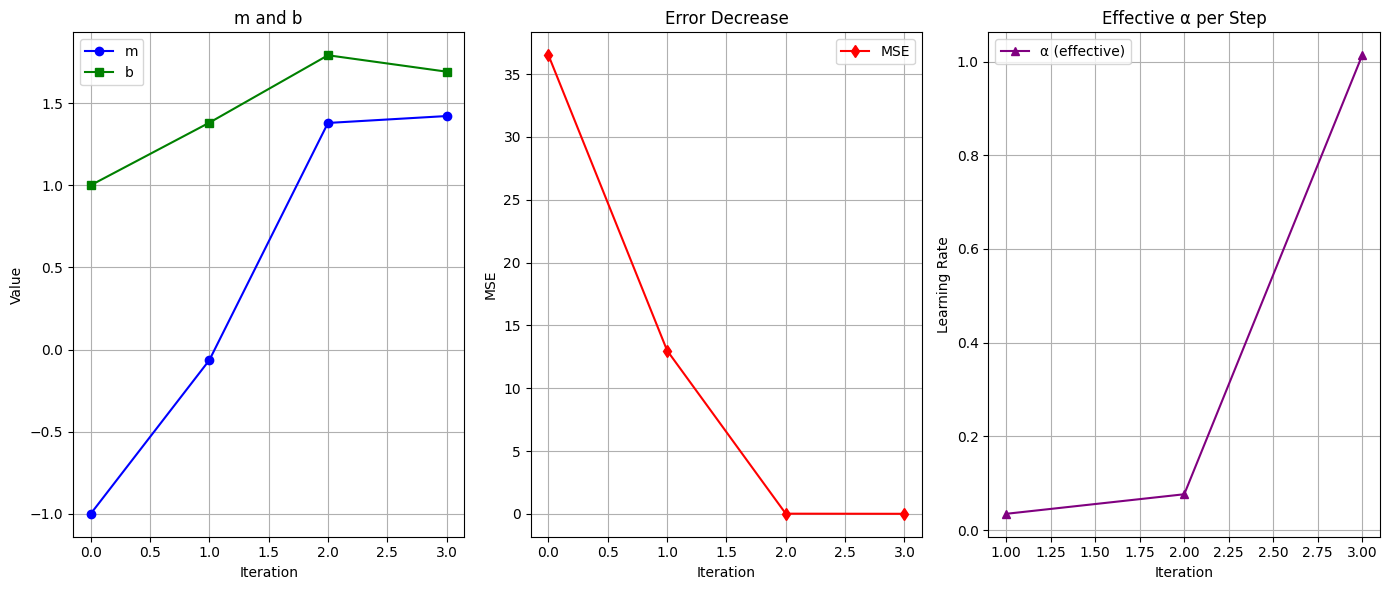

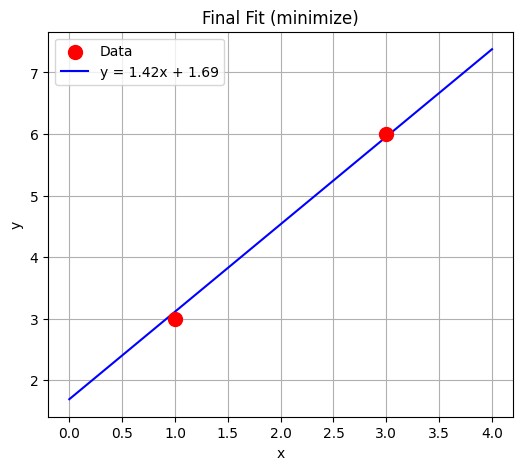

In [5]:
#Gradient descent using scipy (no fixed learning rate)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Starting points
x = np.array([1.0, 3.0])
y_true = np.array([3.0, 6.0])

# Cost calculation
def cost(params):
    m, b = params
    return np.mean((y_true - (m * x + b))**2)

# ∂J/∂m
# ∂J/∂b
def gradient(params):
    m, b = params
    errors = y_true - (m * x + b)
    n = len(x)
    return np.array([
        -2/n * np.sum(errors * x),
        -2/n * np.sum(errors)
    ])

#Loop iteration
iteration = 0
prev_params = np.array([-1.0, 1.0])  # to compute step size
history = []

#show_step
def show_step(params):
    global iteration, prev_params
    iteration += 1
    m, b = params

    # 1. Y hat
    y_pred = m * x + b
    y_pred1 = y_pred[0]
    y_pred2 = y_pred[1]

    # 2. Cost
    err1 = y_true[0] - y_pred1
    err2 = y_true[1] - y_pred2

    # 3. MSE
    mse = np.mean([err1**2, err2**2])

    # 4. Gradient at PREVIOUS point
    grad_prev = gradient(prev_params)
    grad_m_prev = grad_prev[0]
    grad_b_prev = grad_prev[1]

    # 5. Step taken
    step_m = m - prev_params[0]
    step_b = b - prev_params[1]

    #6. Effective learning rate (alpha)
    alpha_m = abs(step_m / grad_m_prev) if grad_m_prev != 0 else 0
    alpha_b = abs(step_b / grad_b_prev) if grad_b_prev != 0 else 0
    alpha_avg = (alpha_m + alpha_b) / 2 if (alpha_m + alpha_b) > 0 else 0

    # 7. Print detailed step
    print(f"Iter {iteration}:")
    print(f"   m = {m:6.3f}, b = {b:6.3f}")
    print(f"   y_pred = [{y_pred1:6.3f}, {y_pred2:6.3f}]")
    print(f"   error  = [{err1:6.3f}, {err2:6.3f}]")
    print(f"   MSE    = {mse:.5f}")
    print(f"   ∇m = {grad_m_prev:7.3f}, ∇b = {grad_b_prev:7.3f}")
    print(f"   Δm = {step_m:6.3f}, Δb = {step_b:6.3f}")
    print(f"   α ≈ {alpha_avg:.3f} (effective learning rate)")
    print("-" * 50)

    # Save
    history.append((m, b, mse, alpha_avg))
    prev_params = params.copy()  # update for next step

#INITIAL PRINT
print("START → m = -1.000, b =  1.000")
print("   y_pred = [ 0.000, -2.000]")
print("   error  = [ 3.000,  8.000]")
print("   MSE    = 36.50000")
print("-" * 50)

# RUN minimize
result = minimize(
    fun=cost,
    x0=[-1.0, 1.0],
    jac=gradient,
    method='BFGS',
    callback=show_step,
    options={'maxiter': 3}
)

#FINAL PREDICTIONS
m_final, b_final = result.x
final_pred = m_final * x + b_final
print("FINAL PREDICTIONS:")
for i in range(len(x)):
    print(f"   x={x[i]}, y_true={y_true[i]}, y_pred={final_pred[i]:.3f}")

print(f"\nRESULT (from minimize):")
print(f"   m = {m_final:.3f}, b = {b_final:.3f}, cost = {result.fun:.5f}")

# PLOTS
m_hist = [h[0] for h in history]
b_hist = [h[1] for h in history]
err_hist = [h[2] for h in history]
alpha_hist = [h[3] for h in history]
iters = list(range(1, len(history)+1))

plt.figure(figsize=(14, 6))

# Plot 1: m, b, alpha
plt.subplot(1, 3, 1)
plt.plot([0] + iters, [-1.0] + m_hist, 'o-', label='m', color='blue')
plt.plot([0] + iters, [1.0] + b_hist, 's-', label='b', color='green')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('m and b')
plt.legend()
plt.grid()

# Plot 2: MSE
plt.subplot(1, 3, 2)
initial_mse = cost([-1.0, 1.0])
plt.plot([0] + iters, [initial_mse] + err_hist, 'd-', color='red', label='MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Error Decrease')
plt.legend()
plt.grid()

# Plot 3: Effective alpha
plt.subplot(1, 3, 3)
plt.plot(iters, alpha_hist, '^-', color='purple', label='α (effective)')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Effective α per Step')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Final line plot
plt.figure(figsize=(6, 5))
plt.scatter(x, y_true, color='red', s=100, label='Data', zorder=5)
x_line = np.linspace(0, 4, 100)
plt.plot(x_line, m_final * x_line + b_final, 'b-',
         label=f'y = {m_final:.2f}x + {b_final:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Fit (minimize)')
plt.legend()
plt.grid()
plt.show()

START → m = -1.000, b =  1.000
   y_pred = [ 0.000, -2.000]
   error  = [ 3.000,  8.000]
   MSE    = 36.50000
--------------------------------------------------
Iter 1:
   m =  1.700, b =  2.100
   y_pred = [ 0.000, -2.000]
   error  = [ 3.000,  8.000]
   MSE    = 36.50000
   ∇m = -27.000, ∇b = -11.000
   Δm =  2.700, Δb =  1.100
   α = 0.100 (fixed learning rate)
--------------------------------------------------
Iter 2:
   m =  1.260, b =  1.900
   y_pred = [ 3.800,  7.200]
   error  = [-0.800, -1.200]
   MSE    = 1.04000
   ∇m =   4.400, ∇b =   2.000
   Δm = -0.440, Δb = -0.200
   α = 0.100 (fixed learning rate)
--------------------------------------------------
Iter 3:
   m =  1.340, b =  1.916
   y_pred = [ 3.160,  5.680]
   error  = [-0.160,  0.320]
   MSE    = 0.06400
   ∇m =  -0.800, ∇b =  -0.160
   Δm =  0.080, Δb =  0.016
   α = 0.100 (fixed learning rate)
--------------------------------------------------
FINAL PREDICTIONS:
   x=1.0, y_true=3.0, y_pred=3.256
   x=3.0, y_true

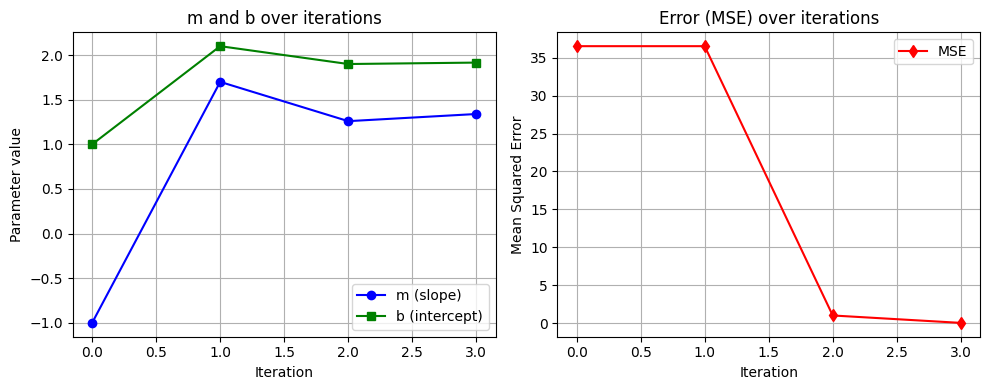

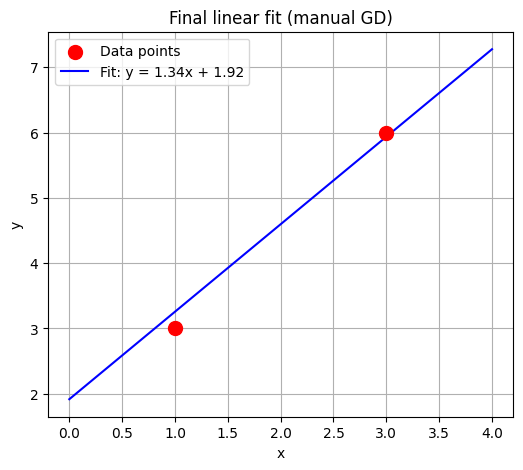

In [6]:
#MANUAL Gradient Descent – fixed α = 0.1

import numpy as np
import matplotlib.pyplot as plt

# starting points
x = np.array([1.0, 3.0])
y_true = np.array([3.0, 6.0])

m = -1.0
b = 1.0
alpha = 0.1
n_iter = 4

# Containers for the two plots
m_history = [m]
b_history = [b]
mse_history = []
y_pred_history = []

#Initial printing messages
print("START → m = -1.000, b =  1.000")
y_pred0 = m * x + b
err0   = y_true - y_pred0
mse0   = np.mean(err0**2)
print(f"   y_pred = [{y_pred0[0]:6.3f}, {y_pred0[1]:6.3f}]")
print(f"   error  = [{err0[0]:6.3f}, {err0[1]:6.3f}]")
print(f"   MSE    = {mse0:.5f}")
print("-" * 50)

#Iterations
for it in range(1, n_iter + 1):
    # 1. y predicted
    y_pred = m * x + b
    y_pred1, y_pred2 = y_pred[0], y_pred[1]

    # 2. error
    err1 = y_true[0] - y_pred1
    err2 = y_true[1] - y_pred2

    # 3. MSE (cost)
    mse = np.mean([err1**2, err2**2])
    mse_history.append(mse)
    y_pred_history.append(y_pred.copy())

    # 4. gradient (∂J/∂m , ∂J/∂b)
    n = len(x)
    grad_m = - (2/n) * np.sum((y_true - y_pred) * x)
    grad_b = - (2/n) * np.sum((y_true - y_pred))

    # 5. step size
    step_m = alpha * grad_m
    step_b = alpha * grad_b

    # 6. update parameters
    m_new = m - step_m
    b_new = b - step_b

    # 7. detailed print (same layout as the callback)
    print(f"Iter {it}:")
    print(f"   m = {m_new:6.3f}, b = {b_new:6.3f}")
    print(f"   y_pred = [{y_pred1:6.3f}, {y_pred2:6.3f}]")
    print(f"   error  = [{err1:6.3f}, {err2:6.3f}]")
    print(f"   MSE    = {mse:.5f}")
    print(f"   ∇m = {grad_m:7.3f}, ∇b = {grad_b:7.3f}")
    print(f"   Δm = { -step_m:6.3f}, Δb = { -step_b:6.3f}")
    print(f"   α = {alpha:.3f} (fixed learning rate)")
    print("-" * 50)

    # store for plotting
    m = m_new
    b = b_new
    m_history.append(m)
    b_history.append(b)

# ------------------- FINAL PREDICTIONS --------------------
final_pred = m * x + b
print("FINAL PREDICTIONS:")
for i in range(len(x)):
    print(f"   x={x[i]}, y_true={y_true[i]}, y_pred={final_pred[i]:.3f}")

print(f"\nRESULT (manual GD):")
print(f"   m = {m:.3f}, b = {b:.3f}, cost = {mse:.5f}")

#PLOT 1: m, b, MSE
iterations = list(range(n_iter + 1))
mse_history = [mse0] + mse_history

plt.figure(figsize=(10, 4))

# left sub-plot : m & b
plt.subplot(1, 2, 1)
plt.plot(iterations, m_history, 'o-', label='m (slope)', color='blue')
plt.plot(iterations, b_history, 's-', label='b (intercept)', color='green')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.title('m and b over iterations')
plt.legend()
plt.grid(True)

# right sub-plot : MSE
plt.subplot(1, 2, 2)
plt.plot(iterations, mse_history, 'd-', color='red', label='MSE')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Error (MSE) over iterations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# PLOT 2: final line + data
plt.figure(figsize=(6, 5))
plt.scatter(x, y_true, color='red', s=100, label='Data points', zorder=5)

x_line = np.linspace(0, 4, 200)
plt.plot(x_line, m * x_line + b,
         color='blue', label=f'Fit: y = {m:.2f}x + {b:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Final linear fit (manual GD)')
plt.legend()
plt.grid(True)
plt.show()